# 2019110633 이상혁

## 도서추천 프로그램

(원래 하던 주제랑 동일하지만 크롤링을 하려던 사이트에서 도서들의 업데이트가 제 때 이루어지지 않아 검색에 불편함을 느껴 부득이하게 'NAVER Developers'로 옮겨서 크롤링을 하였습니다.)

### 1) 주제 선정 이유

제가 관심을 가지고 있는 분야에서 직접 책을 살펴보고 조사하고 싶어서 이 주제를 고르게 되었습니다. 평소에도 필요한 책이 있다면 인터넷에서 여러 가지의 책들을 가지고 비교 끝에 책방에 가서 구매를 하는데, 이 과정을 제가 직접 제작해서 사용해보고 싶었습니다.

### 2) 주제 정의
이번 term project에서 구현 할 "도서 추천 프로그램"을 통해서 이 프로그램이 정말 나를 위한 도서를 추천할 수 있는지, 또는 내가 입력 할 키워드와 알맞은 주제를 가진 책들을 보여줄 수 있는지에 대해 증명하고자 합니다.

### 3) & 8) 인터넷을 통한 데이터 획득
#### 데이터의 출처:  https://developers.naver.com/docs/serviceapi/search/book/book.md#%EC%B1%85

해당 사이트에서 오픈 API인 다양한 도서의 일반 정보를 포함한 메타정보 서비스를 담고있는 네이버 오픈 api를 통해 데이터를 추출합니다.


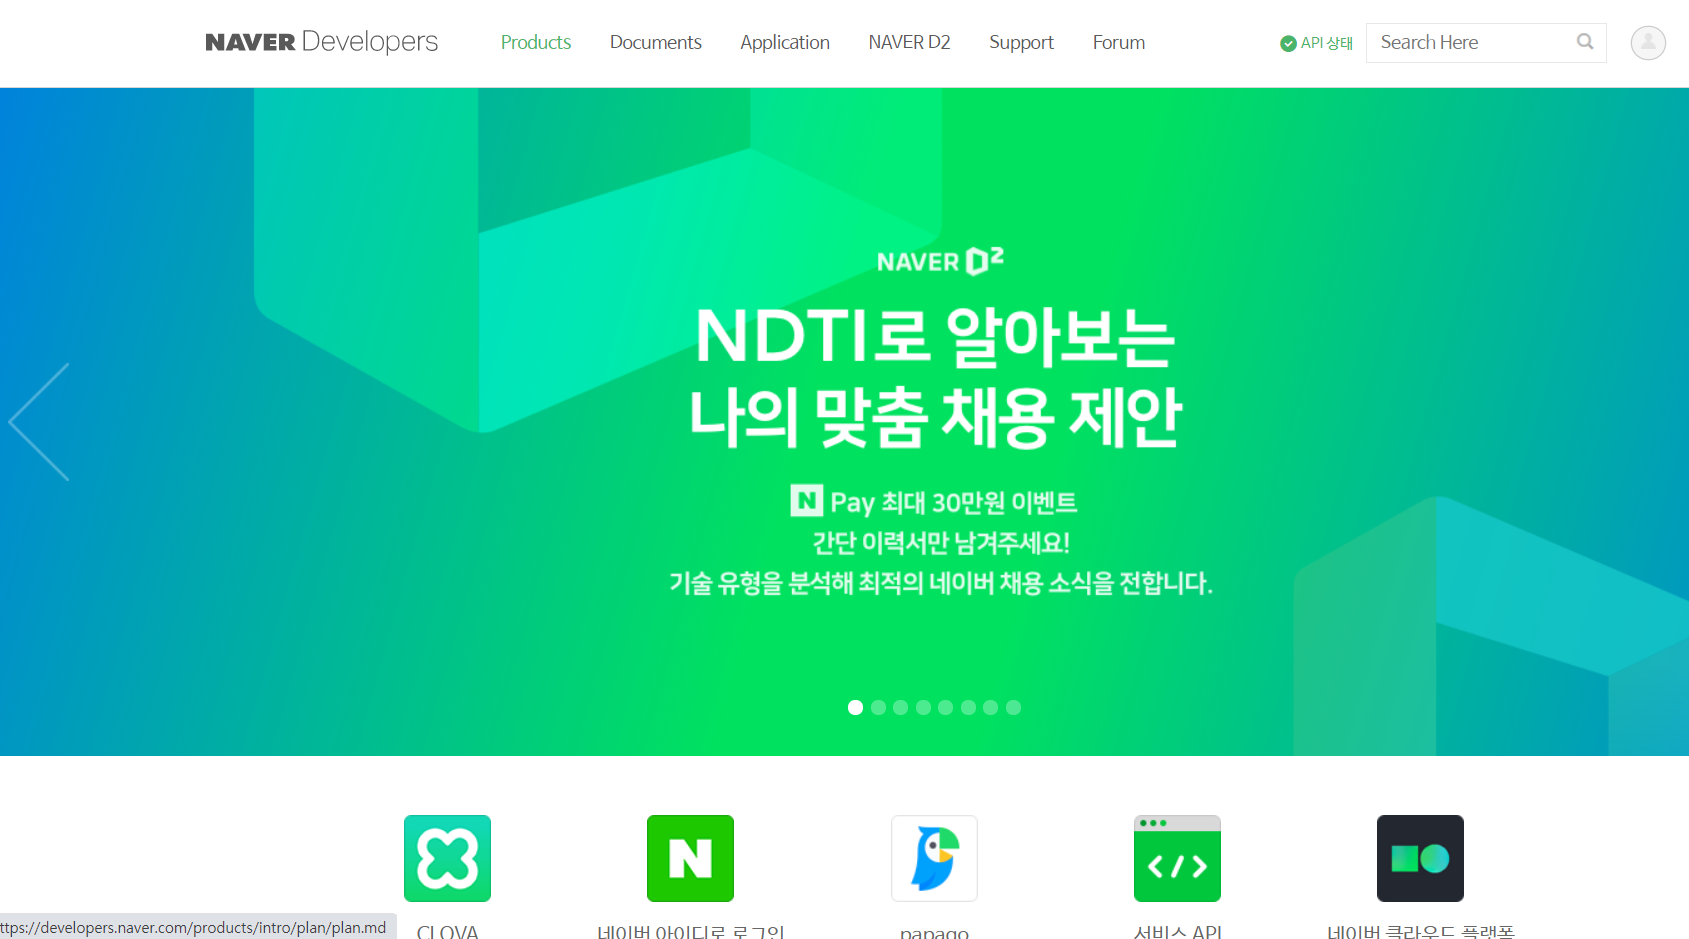

<br><br><br>

이후에 해당 API에서 뽑아낸 자료들을 기반으로 도서의 이름을 추출하여 사용자가 검색한 단어와 일치하는 모든 도서들의 설명, 지은이, 추천이 등을 출력하여 사용자에게 보여줍니다.
<br>
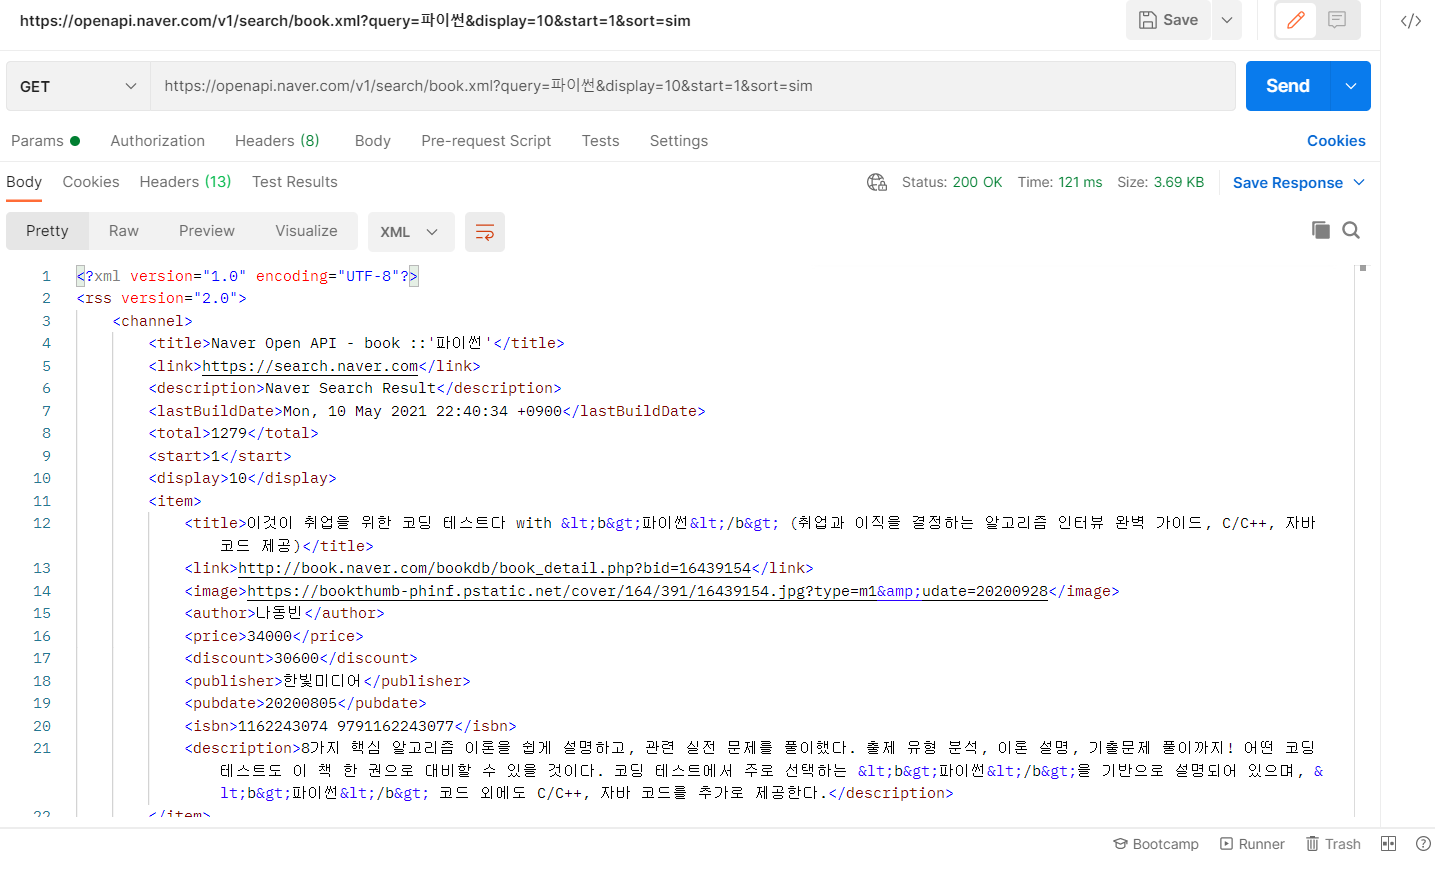
<br>

### 4) & 9) 데이터 가공

In [1]:
import urllib.request

해당 URL을 열 수 있게 도와주는 모듈

In [2]:
from urllib.parse import quote

내가 원하는 도서 검색을 하기 위해 인용문을 치환할 수 있게 도와주는 모듈

In [3]:
import xmltodict

'Naver Developers'에서 데이터를 받는 'xml'형식을 'json'으로 변환할 수 있게 해주는 모듈

In [4]:
import json
import re

크롤링 한 데이터들을 좀 더 쉽게 다루기 위해 사용한 모듈(dictionary 형태) 과 출력된 결과물들 안에 불필요한 특수문자나 HTML태그들을 제거하기 위한 정규표현식 모듈

In [25]:
keyword = input("검색어를 입력하세요: ")
print("\n")

query = "?query=" + quote(keyword) #사용자의 도서검색 keyword
url = 'https://openapi.naver.com/v1/search/book.xml' + query + '&display=3'

client_id = 'oEOYGZMFBhbhT2oAk7SD' #'Naver Developers에서 받은 사용자 ID'
client_secret = 'BhWoGQAWW_'       #'Naver Developers에서 받은 사용자 Secret'
print(url)

검색어를 입력하세요: 파이썬


https://openapi.naver.com/v1/search/book.xml?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC&display=3


In [24]:
#url 사이트에 요청을 한 후, client ID, Secret을 header에 입력

req = urllib.request.Request(url)
req.add_header('X-Naver-Client-Id', client_id)
req.add_header('X-Naver-Client-Secret', client_secret)
res = urllib.request.urlopen(req).read().decode('utf-8') #요청한 req를 'utf-8'형식으로 해독하고 urllib.request.urlopen을 통해 읽어옵니다..

In [7]:
ordereddict = xmltodict.parse(res)
print(ordereddict)

OrderedDict([('rss', OrderedDict([('@version', '2.0'), ('channel', OrderedDict([('title', "Naver Open API - book ::'파이썬'"), ('link', 'https://search.naver.com'), ('description', 'Naver Search Result'), ('lastBuildDate', 'Sun, 06 Jun 2021 19:31:33 +0900'), ('total', '1291'), ('start', '1'), ('display', '3'), ('item', [OrderedDict([('title', '혼자 공부하는 <b>파이썬</b> (<b>파이썬</b> 최신 버전 반영)'), ('link', 'http://book.naver.com/bookdb/book_detail.php?bid=15028688'), ('image', 'https://bookthumb-phinf.pstatic.net/cover/150/286/15028688.jpg?type=m1&udate=20210127'), ('author', '윤인성'), ('price', '18000'), ('discount', '16200'), ('publisher', '한빛미디어'), ('pubdate', '20190610'), ('isbn', '1162241888 9791162241882'), ('description', '1:1 과외하듯 배우는 <b>파이썬</b> 프로그래밍 자습서(<b>파이썬</b> 최신 버전 반영)\n27명의 베타리더 검증으로, ‘함께 만든’ 입문자 맞춤형 도서이 책은 독학으로 프로그래밍 언어를 처음 배우려는 입문자가, 혹은 <b>파이썬</b>을 배우려는 입문자가 ‘꼭 필요한 내용을 제대로’ 학습할 수 있도록 구성했다. ‘무엇을’...')]), OrderedDict([('title', 'Do it! 점프 투 <b>파이썬</b>'), ('link', 'http://book.naver.com

```python
ordereddict = xmltodict.parse(res)
#dictionary는 순서가 없지만 req에서 읽어온 데이터들을 순서가 있는 ordereddict 형태로 저장합니다.
```

In [8]:
tojson = json.dumps(ordereddict['rss']['channel']['item'], indent=4, ensure_ascii=False)
print(tojson)
json_loads = json.loads(tojson)
print(type(json_loads))

[
    {
        "title": "혼자 공부하는 <b>파이썬</b> (<b>파이썬</b> 최신 버전 반영)",
        "link": "http://book.naver.com/bookdb/book_detail.php?bid=15028688",
        "image": "https://bookthumb-phinf.pstatic.net/cover/150/286/15028688.jpg?type=m1&udate=20210127",
        "author": "윤인성",
        "price": "18000",
        "discount": "16200",
        "publisher": "한빛미디어",
        "pubdate": "20190610",
        "isbn": "1162241888 9791162241882",
        "description": "1:1 과외하듯 배우는 <b>파이썬</b> 프로그래밍 자습서(<b>파이썬</b> 최신 버전 반영)\n27명의 베타리더 검증으로, ‘함께 만든’ 입문자 맞춤형 도서이 책은 독학으로 프로그래밍 언어를 처음 배우려는 입문자가, 혹은 <b>파이썬</b>을 배우려는 입문자가 ‘꼭 필요한 내용을 제대로’ 학습할 수 있도록 구성했다. ‘무엇을’..."
    },
    {
        "title": "Do it! 점프 투 <b>파이썬</b>",
        "link": "http://book.naver.com/bookdb/book_detail.php?bid=15052904",
        "image": "https://bookthumb-phinf.pstatic.net/cover/150/529/15052904.jpg?type=m1&udate=20200910",
        "author": "박응용",
        "price": "18800",
        "discount": "16920",
        "publisher": "이지스퍼블리싱

```python
tojson = json.dumps(ordereddict['rss']['channel']['item'], indent=4, ensure_ascii=False) 
#json.dumps를 사용해서 해당 json dictionary를 str로 변환합니다
json_loads = json.loads(tojson)
#json.loads를 사용해서 json형태를 python에 맞게 변환합니다.
```

### 5) 분석 결과 도출

4) 분석을 위한 데이터의 가공을 마친 코드를 통해서 사용자가 코드를 좀 더 명확히 이해할 수 있도록 class를 통한 코드를 구현했습니다.<br>
<br>처음 생성자를 통해서 사용자가 도서명을 입력할 'kewyord', 검색할 도서의 개수를 입력할 'display' 그리고 사용자에게 보여주는 페이지 번호를 'start' 입력합니다. 또한 naver developers에서 받은 api를 추출하는데 사용될 client id, secret 그리고 url을 입력합니다. <br><br>
이후에 get_url method에서는 사용자에게서 생성자로 만든 세 개의 인풋을 입력 받아서 추후에 검색해야 할 url 주소를 완성시킵니다. <br><br>
그 다음 메소드인 rr_url은 사용자가 서버에 request하고 서버는 사용자에게 response를 하게 해주는 메소드이며, 추가로 xml형태로 되어있는 데이터를 json형태의 데이터로 변환 시켜주는 xmltodict 모듈을 통해, 처리가 쉽게끔 바꿔줍니다<br><br>
마지막으로 info는 rr_url 메소드에서 처리된 데이터를 불러와서 사용자에게 깔끔하게 보여주게 하는 메소드입니다. for문을 통해 해당 딕셔너리에 있는 item들을 출력하기 위해 그 item에 알맞은 key값을 검색해서 출력하게 합니다.

In [22]:
import urllib.request
from urllib.parse import quote
import xmltodict
import json
import re

class BookSearch:
    
    def __init__(self):
        self.keyword = ''
        self.display = 0
        self.start = 0
        self.url = 'https://openapi.naver.com/v1/search/book.xml'
        self.client_id = 'oEOYGZMFBhbhT2oAk7SD'
        self.client_secret = 'BhWoGQAWW_'

    def get_url(self, keyword, display, start):
        query = "?query=" + quote(keyword)
        dis = "&display=" + str(display)
        pages = "&start=" + str(start)
        self.url = self.url + query + dis + pages
        return self.url
    
    def rr_url(self):
        req = urllib.request.Request(self.url)
        req.add_header('X-Naver-Client-Id', self.client_id)
        req.add_header('X-Naver-Client-Secret', self.client_secret)
        res = urllib.request.urlopen(req).read().decode('utf-8')
        ordereddict = xmltodict.parse(res)
        tojson = json.dumps(ordereddict['rss']['channel']['item'], indent=4, ensure_ascii=False)
        json_loads = json.loads(tojson)
        return json_loads
    
    def show_info(self):
        items = self.rr_url()
        for item in items:
            print("제목: " + re.sub('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', item['title']))
            print("설명: " + re.sub('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', item['description']))
            print("작가: " + item['author'])
            print("도서 정보: " + item['link'])
            print("가격: " + item['price'] + "원")
            print("\n\n")

if __name__ == '__main__':
    book = BookSearch()
    word = input('도서명을 입력하세요: ')
    disp = input('출력되는 도서들의 권수를 입력해주세요:(최소 2권 이상) ')
    page = input('찾고싶은 페이지를 입력해주세요: ')
    print()
    print()
    book.get_url(word, disp, page)
    book.show_info()

도서명을 입력하세요: 파이썬
출력되는 도서들의 권수를 입력해주세요:(최소 2권 이상) 5
찾고싶은 페이지를 입력해주세요: 1


제목: 혼자 공부하는 파이썬 (파이썬 최신 버전 반영)
설명: 1:1 과외하듯 배우는 파이썬 프로그래밍 자습서(파이썬 최신 버전 반영)
27명의 베타리더 검증으로, ‘함께 만든’ 입문자 맞춤형 도서이 책은 독학으로 프로그래밍 언어를 처음 배우려는 입문자가, 혹은 파이썬을 배우려는 입문자가 ‘꼭 필요한 내용을 제대로’ 학습할 수 있도록 구성했다. ‘무엇을’...
작가: 윤인성
도서 정보: http://book.naver.com/bookdb/book_detail.php?bid=15028688
가격: 18000원



제목: Do it! 점프 투 파이썬
설명: 파이썬 4년 연속 베스트셀러 1위!
《DO IT! 점프 투 파이썬》 전면 개정판 출시!문과생도 중고등학생도 직장인도 프로그래밍에 눈뜨게 만든 바로 그 책이... 점프 투 파이썬》으로 출간되었던 이 책은 약 4년 동안의 피드백을 반영하여 초보자가 더 빠르게 입문하고, 더 깊이 있게 공부할 수 있도록 개정되었다....
작가: 박응용
도서 정보: http://book.naver.com/bookdb/book_detail.php?bid=15052904
가격: 18800원



제목: 파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트)
설명: 물론, 파이썬으로 구현하는 코드 풀이를 통해 성능 최적화 기법, 파이썬의 핵심 문법과 다양한 실용 테크닉까지 배울 수 있는, 초보 개발자와 숙련 개발자... 이 책은 현업과 실무에 유용한 주요 알고리즘 이론을 깊숙이 이해하고, 파이썬의 핵심 기능과 문법까지 상세하게 이해할 수 있는 취업용 코딩 테스트를...
작가: 박상길
도서 정보: http://book.naver.com/bookdb/book_detail.php?bid=16406247
가격: 38000원



제목: 파이썬 데이터 과학 통계 학습 (Python Data Scie

### 6) 결론

제가 처음 목표로 둔 '사용자가 검색한 도서 출력'이 위의 결과가 보여주는 것과 같이 오류 없이 성공적으로 출력됩니다. 검색은 <b>'검색 단어', '도서 개수', '페이지 수'</b> 이렇게 총 세 가지의 사용자의 입력을 요구합니다.
사용자는 도서의 풀네임을 입력하지 않아도 두 글자 이상만 입력한다면 본인이 검색하고 싶은 도서명을 검색할 수 있습니다. 검색어가 늘어나면 좀 더 정확한 도서명을 출력할 수도 있습니다. 만약 첫 페이지에 사용자가 원하는 도서가 없다면 사용자 입력에서 페이지를 넘겨가며 도서들을 출력하고 계속해서 해당 도서들의 링크로 들어가서 비교후에 원하는 도서를 고를 수 있게됩니다.

### 7) 참고 문헌

open API 추출사이트: https://developers.naver.com/main/
<br>api를 통한 정보추출: https://wayhome25.github.io/python/2017/07/15/naver-search-api/ <br>xml에서 json으로 변환: https://kibua20.tistory.com/146
<br>특수문자 제거: https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D#%EB%AC%B8%EB%B2%95

### 10) 별첨

```python
import urllib.request
from urllib.parse import quote
import xmltodict
import json
import re

class BookSearch:
    
    def __init__(self):
        self.keyword = ''
        self.display = 0
        self.start = 0
        self.url = 'https://openapi.naver.com/v1/search/book.xml'
        self.client_id = 'oEOYGZMFBhbhT2oAk7SD'
        self.client_secret = 'BhWoGQAWW_'

    def get_url(self, keyword, display, start):
        query = "?query=" + quote(keyword)
        dis = "&display=" + str(display)
        pages = "&start=" + str(start)
        self.url = self.url + query + dis + pages
        return self.url
    
    def rr_url(self):
        req = urllib.request.Request(self.url)
        req.add_header('X-Naver-Client-Id', self.client_id)
        req.add_header('X-Naver-Client-Secret', self.client_secret)
        res = urllib.request.urlopen(req).read().decode('utf-8')
        ordereddict = xmltodict.parse(res)
        tojson = json.dumps(ordereddict['rss']['channel']['item'], indent=4, ensure_ascii=False)
        json_loads = json.loads(tojson)
        return json_loads
    
    def show_info(self):
        items = self.rr_url()
        for item in items:
            print("제목: " + re.sub('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', item['title']))
            print("설명: " + re.sub('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', item['description']))
            print("작가: " + item['author'])
            print("도서 정보: " + item['link'])
            print("가격: " + item['price'] + "원")
            print("\n\n")

if __name__ == '__main__':
    book = BookSearch()
    word = input('도서명을 입력하세요: ')
    disp = input('출력되는 도서들의 권수를 입력해주세요:(최소 2권 이상) ')
    page = input('찾고싶은 페이지를 입력해주세요: ')
    print()
    print()
    book.get_url(word, disp, page)
    book.show_info()
```